In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/drive/MyDrive/day42-outlier-removal-using-zscore/placement.csv')

In [5]:
df.shape

(1000, 3)

In [6]:
df.sample(10)

,cgpa,placement_exam_marks,placed
465,7.65,49.0,0
210,6.58,19.0,1
428,7.89,46.0,0
541,6.11,18.0,1
367,6.41,30.0,0
627,6.31,30.0,1
326,7.54,13.0,0
322,6.77,38.0,1
926,7.02,14.0,0
120,6.99,46.0,1


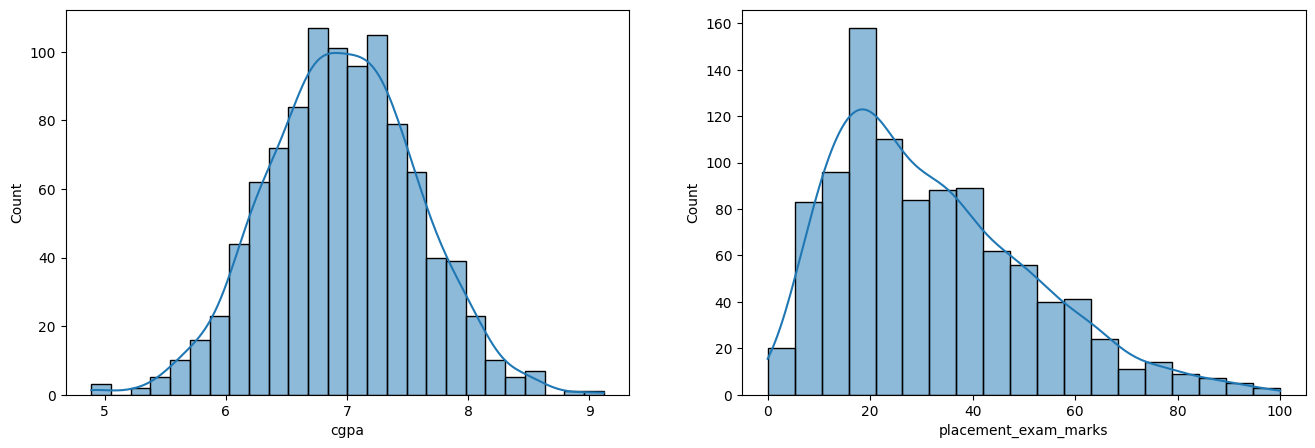

In [8]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde=True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'], kde=True)

plt.show()


In [9]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [10]:
df['cgpa'].skew()

-0.014529938929314918

In [11]:
df['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


<Axes: xlabel='placement_exam_marks'>

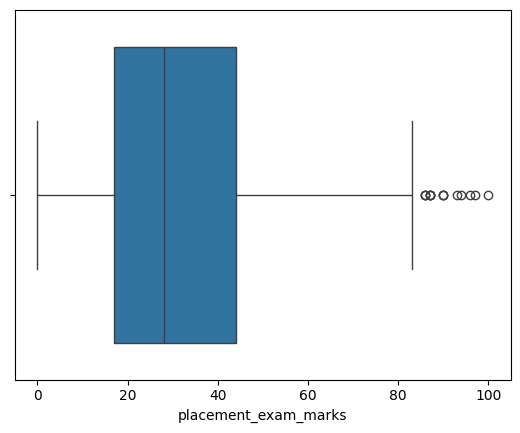

In [13]:
sns.boxplot(x=df['placement_exam_marks'])

In [14]:
# Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [15]:
print(percentile25)
print(percentile75)

17.0
44.0


In [16]:
# Interquartile range
iqr = percentile75 - percentile25
iqr

27.0

In [17]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

In [18]:
print("Upper limit =", upper_limit)
print("Lower limit =", lower_limit)

Upper limit = 84.5
Lower limit = -23.5


### Finding Outliers

In [19]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [21]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


## Outlier Treatment

### 1. Trimming

In [22]:
new_df = df[df['placement_exam_marks'] < upper_limit]

In [23]:
new_df.shape

(985, 3)

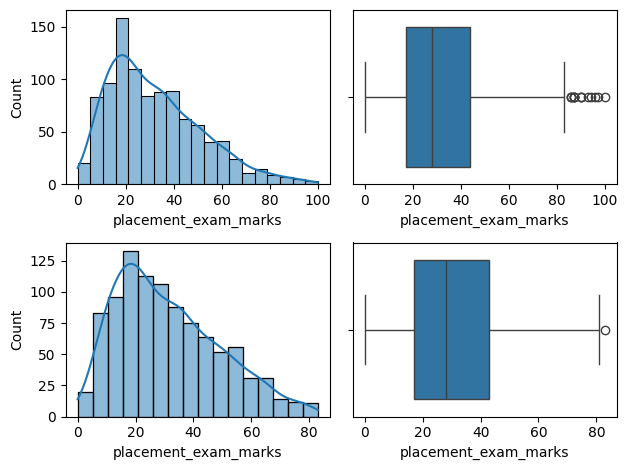

In [27]:
# Comparing

plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(x=df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df['placement_exam_marks'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(x=new_df['placement_exam_marks'])

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

### 2. Capping

In [28]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [29]:
new_df_cap.shape

(1000, 3)

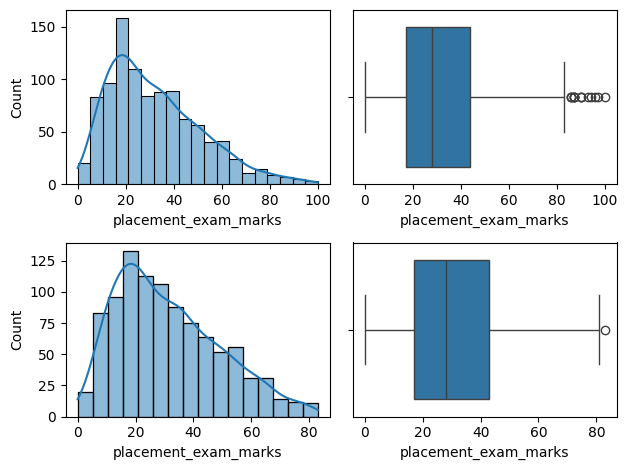

In [30]:
# Comparing

plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(x=df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df['placement_exam_marks'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(x=new_df['placement_exam_marks'])

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()